# SVM - TikTok

In [1]:
import sys
import os
import pandas as pd

# Agregar el directorio raiz al PYTHONPATH
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

Importar modelo de SVM para entrenarlo

In [2]:
from src.trainers.train_svm import train_svm
from src.trainers.utils import evaluate_model
from src.trainers.utils import save_model, load_model
from src.trainers.utils import build_datasets, save_metrics
from constants.constants_tiktok import SVM_TFIDF_PIPELINE_PATH, SVM_BOW_PIPELINE_PATH
from constants.constants_tiktok import TIKTOK_DATASET_SENTENCES, TIKTOK_SVM_METRICS_PATH

dataset_train, dataset_test, dataset_val = build_datasets(
    TIKTOK_DATASET_SENTENCES,
    test_size=0.3,
    val_size=0.5, # 0.5 de 0.3    
    random_state=42
)
print(dataset_train.shape)
print(dataset_test.shape)
print(dataset_val.shape)

(13727, 2)
(2942, 2)
(2942, 2)


In [3]:
print(dataset_train.info())
print(dataset_test.info())
print(dataset_val.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13727 entries, 0 to 13726
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      13727 non-null  object
 1   polarity  13727 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 214.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2942 entries, 0 to 2941
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2942 non-null   object
 1   polarity  2942 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2942 entries, 0 to 2941
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   text      2942 non-null   object
 1   polarity  2942 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 46.1+ KB
None


## SVM + TFIDF

Accuracy: 0.6961250849762066

Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       980
           1       0.61      0.62      0.61       981
           2       0.77      0.78      0.78       981

    accuracy                           0.70      2942
   macro avg       0.70      0.70      0.70      2942
weighted avg       0.70      0.70      0.70      2942

Matriz de confusión
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\svm\svm_tfidf_pipline.pkl


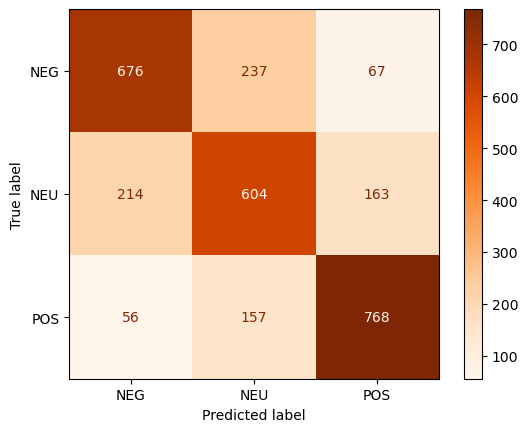

In [4]:
pipeline, metrics = train_svm(
    dataset_train,
    dataset_val,
    C=1.8,
    kernel="linear", # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
    vec="tfidf"
)
# Guardar Pipeline
save_model(pipeline, SVM_TFIDF_PIPELINE_PATH)
save_metrics(metrics, TIKTOK_SVM_METRICS_PATH)

### Evaluación

La evaluación final se realiza con el conjunto de datos de prueba

Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\svm\svm_tfidf_pipline.pkl
Accuracy: 0.6883072739632903

Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.72      0.67      0.69       981
           1       0.59      0.62      0.60       980
           2       0.76      0.78      0.77       981

    accuracy                           0.69      2942
   macro avg       0.69      0.69      0.69      2942
weighted avg       0.69      0.69      0.69      2942

Matriz de confusión


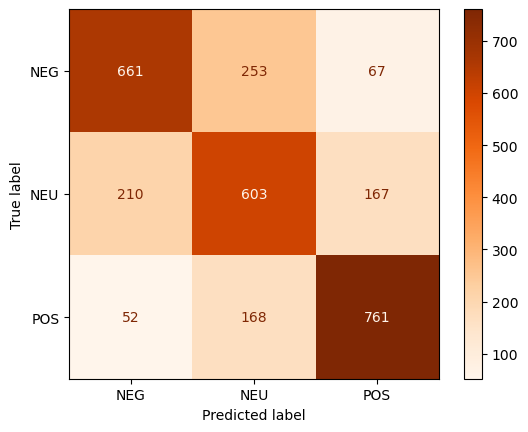

In [5]:
from constants.constants_tiktok import SVM_TFIDF_PIPELINE_PATH

pipeline = load_model(SVM_TFIDF_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test)

In [10]:
from constants.constants_nlp import INDEX_TO_POLARITY
from src.preprocesamiento.clean import clean_text
from src.preprocesamiento.nlp_spacy import preprocesamiento

In [11]:
textos_test = ["Hola! cómo estás???😀","el dia de hoy estoy feliz y contento", "estoy muy triste", "Me encuentro estudiando para un exámen", "A veces me encuentro triste, pero la mayoria del tiempo estoy muy feliz"]
textos_test = list(map(lambda x: clean_text(x), textos_test))
textos_test = preprocesamiento(textos_test)

preds = pipeline.predict(textos_test)
for input, pred in zip(textos_test,preds):
    print(f"{input}: {INDEX_TO_POLARITY[pred]}")

Modelo cargado: es_core_news_sm


100%|██████████| 5/5 [00:00<00:00, 1000.31it/s]
5it [00:00, 333.40it/s]

Aplicando stemming...
Total de documentos preprocesados: 5
hol estar: NEU
feliz content: POS
trist: NEG
encontr estudi exam: NEU
encontr trist mayor tiemp feliz: NEG


## SVM + BOW

Accuracy: 0.7036029911624745

Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.73      0.68      0.71       980
           1       0.60      0.67      0.63       981
           2       0.79      0.76      0.78       981

    accuracy                           0.70      2942
   macro avg       0.71      0.70      0.71      2942
weighted avg       0.71      0.70      0.71      2942

Matriz de confusión
Modelo guardado en: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\svm\svm_bow_pipline.pkl


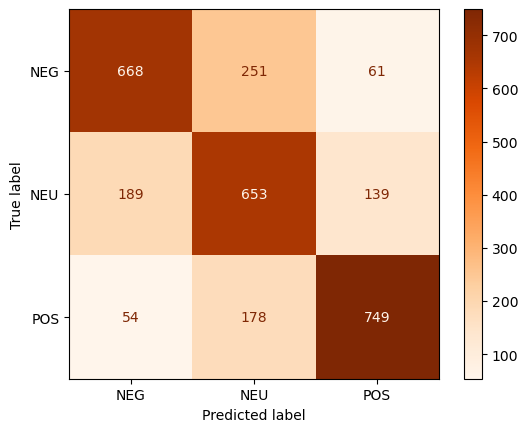

In [6]:
pipeline, metrics = train_svm(
    dataset_train,
    dataset_val,
    C=0.5,
    kernel="linear", # ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’
    vec="bow"
)

# Guardar Pipeline
save_model(pipeline, SVM_BOW_PIPELINE_PATH)
save_metrics(metrics, TIKTOK_SVM_METRICS_PATH)

### Evaluación

Cargando modelo: c:\Users\Diego\Desktop\sentiment_analysis\models\tiktok\svm\svm_bow_pipline.pkl
Accuracy: 0.6910265125764786

Reporte de clasificacion
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       981
           1       0.59      0.68      0.63       980
           2       0.77      0.74      0.76       981

    accuracy                           0.69      2942
   macro avg       0.70      0.69      0.69      2942
weighted avg       0.70      0.69      0.69      2942

Matriz de confusión


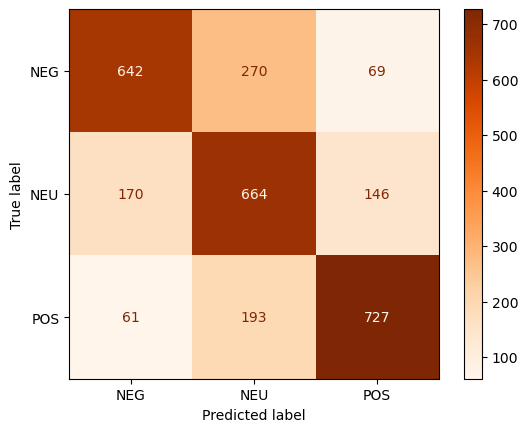

In [7]:
from constants.constants_tiktok import SVM_BOW_PIPELINE_PATH

pipeline = load_model(SVM_BOW_PIPELINE_PATH)
metrics = evaluate_model(pipeline, dataset_test)